In [1]:
import re
def get_validation_values(log_line):
    pattern = r"([\w/]+):\s([\d\.]+)"
    key_vals = re.findall(pattern, log_line)
    log_dict = {kv[0]: kv[1] for kv in key_vals}
    return log_dict

In [2]:

def get_loss_values(log_file, train_loss_value="train/total_loss", val_loss_value="val/total_loss"):
    val_res = []
    train_res = []

    last_epoch = -1
    with open(log_file, "r") as f:
        for line in f:
            results = get_validation_values(line)
            if train_loss_value in results.keys():
                train_res.append(results)
            elif val_loss_value in results.keys():
                val_res.append(results)
    return train_res, val_res


<Figure size 432x288 with 0 Axes>

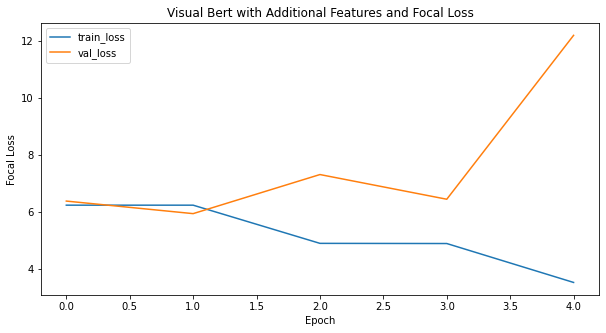

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_and_plot(title, val_res, train_res, epoch_lim = None, save=False, ylabel="Total Loss"):
    val_res_df = pd.json_normalize(val_res)
    val_res_df = val_res_df.rename(columns={"val/total_loss": "val_loss"})
    val_res_df = val_res_df[["epoch", "val_loss"]].dropna()
    val_res_df['val_loss'] = val_res_df['val_loss'].astype(float)
    val_res_df = val_res_df.drop_duplicates(subset=['epoch'], keep="first")

    train_res_df = pd.json_normalize(train_res)
    train_res_df = train_res_df.rename(columns={"train/total_loss": "train_loss"})
    train_res_df = train_res_df[["epoch", "train_loss"]].dropna()
    train_res_df['train_loss'] = train_res_df['train_loss'].astype(float)
    train_res_df = train_res_df.drop_duplicates(subset=['epoch'], keep="first")

    loss_curves = pd.merge(train_res_df, val_res_df, how="left")
    loss_curves["val_loss"] = loss_curves['val_loss'].interpolate(method='linear')
    loss_curves['epoch'] = loss_curves['epoch'].astype(int)

    if epoch_lim:
        loss_curves = loss_curves[loss_curves["epoch"] <= epoch_lim]

    plt.figure()
    loss_curves[["train_loss", "val_loss"]].plot(figsize=(10, 5), xlabel="Epoch", ylabel=ylabel, title=title)


log_files = [
    # './train_val_additional_feature_visual_bert_coco_cleandata.log',
    # './train_val_additional_feature_visual_bert_coco.log', 
    # './train_val_benchmarks_visual_bert_coco.log',
    # './train_val_benchmarks_clean_visual_bert_coco.log',
    # './train_val_benchmarks_vilbert_cc.log',
    # './train_val_benchmarks_vilbert_direct.log',
    # './train_val_focal_additional_feature_visual_bert_coco_50_cleandata.log',
    './train_val_focal_additional_feature_visual_bert_coco_full_cleandata.log',
    # './train_val_additional_feature_visual_bert_coco_cleandata.log',
    # './train_val_CB_with_vmb_100_features.log', 
    #'./train_val_concat_bert_ex.log' #missing logs
]

for log_file in log_files[::-1]:
    train_res, val_res = get_loss_values(log_file, val_loss_value="val/hateful_memes/class_balanced_focal_loss", train_loss_value="train/hateful_memes/class_balanced_focal_loss")
    clean_and_plot("Visual Bert with Additional Features and Focal Loss", val_res, train_res, epoch_lim=5, ylabel="Focal Loss")


<Figure size 432x288 with 0 Axes>

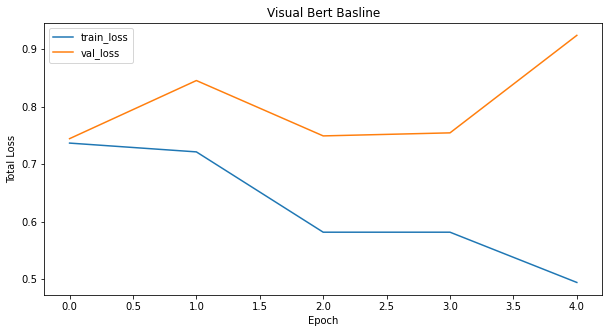

In [183]:
    train_res, val_res = get_loss_values("./train_val_benchmarks_visual_bert_coco.log")

    # print(val_res)
    clean_and_plot("Visual Bert Basline", val_res, train_res, epoch_lim=5)

{'progress': '2400', 'val/hateful_memes/cross_entropy': '1.3719', 'val/total_loss': '1.3719', 'val/hateful_memes/accuracy': '0.6500', 'val/hateful_memes/binary_f1': '0.5478', 'val/hateful_memes/roc_auc': '0.7297'}


<Figure size 432x288 with 0 Axes>

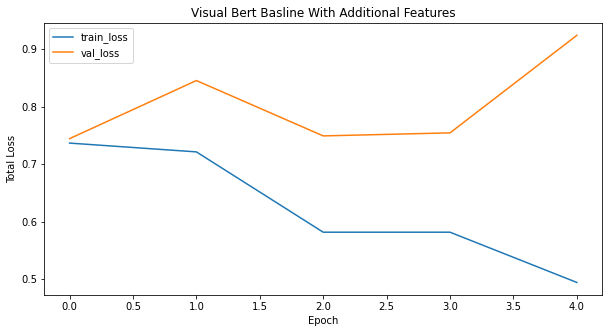

In [185]:
    train_res, val_res = get_loss_values("./train_val_additional_feature_visual_bert_coco.log")
    print(val_res[-1])
    # print(val_res)
    clean_and_plot("Visual Bert Basline With Additional Features", val_res, train_res, epoch_lim=5)